# Artificial Neural Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

- multilayer perceptrons

In [253]:
def sig(x):
    return 1/(1+np.exp(-x))

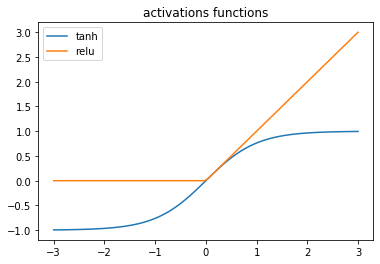

In [259]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label ='tanh')
plt.plot(line, np.maximum(line,0), label ='relu')
# plt.plot(line, sig(line), label ='sig')
plt.title('activations functions')
plt.legend()

    -input - standardization is important
    -output - can be categorical, binary or continuos
    -we can have differnt forms of the activation function(rectification, sigmoid, etc). Example: is common to apply the rectification into the hidden layers and the sigmoid on the output layer

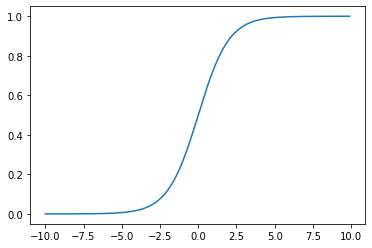

In [257]:
x=np.arange(-10,10,0.1)
plt.plot(x,sig(x))

In [261]:
#CASE 01

Text(0, 0.5, 'Feature 1')

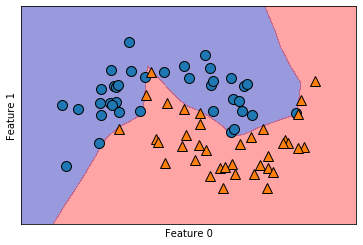

In [270]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import mglearn

X,y = make_moons(n_samples = 100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0, stratify=y)

classifier = MLPClassifier(solver = 'lbfgs').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(classifier, X_train, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [271]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 8 - Deep Learning/Section 39 - Artificial Neural Networks (ANN)/Churn_Modelling.csv")

In [192]:
import warnings
warnings.filterwarnings("ignore")

In [193]:
import theano

In [194]:
import tensorflow

In [195]:
import keras

In [272]:
# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])


# # using one hot enconder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)

ds_encoded = pd.DataFrame(encoder.fit_transform(dataset[['Geography']]))

ds_encoded.columns = encoder.get_feature_names(['Geography'])

dataset.drop(['Geography'] ,axis=1, inplace=True)

dataset= pd.concat([dataset, ds_encoded], axis=1)

dataset = dataset[['RowNumber', 'CustomerId', 'Surname', 'Geography_France', 'Geography_Germany',
                   'Geography_Spain', 'Gender', 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary', 'Exited']]

X=dataset.iloc[:,4:-1].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [235]:
X.shape

(10000, 11)

In [231]:
from keras.models import Sequential
from keras.layers import Dense

#Initialising the ANN
classifier = Sequential()

#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu',input_dim=11))

#Adding the second hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu'))

#Adding the second hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu'))

#Adding the output layer (soft max: more than one category)
classifier.add(Dense(output_dim=1,kernel_initializer = 'uniform', activation='sigmoid'))

In [232]:
#Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

#Fit the ANN ti the training set
classifier.fit(X_train, y_train,batch_size = 10,nb_epoch=100)

Epoch 1/100
7500/7500 [==============================] - 2s 253us/step - loss: 0.4993 - accuracy: 0.7952
Epoch 2/100
7500/7500 [==============================] - 2s 235us/step - loss: 0.4326 - accuracy: 0.7963
Epoch 3/100
7500/7500 [==============================] - 2s 228us/step - loss: 0.4276 - accuracy: 0.7963
Epoch 4/100
7500/7500 [==============================] - 2s 235us/step - loss: 0.4231 - accuracy: 0.7984
Epoch 5/100
7500/7500 [==============================] - 2s 225us/step - loss: 0.4194 - accuracy: 0.8180
Epoch 6/100
7500/7500 [==============================] - 2s 232us/step - loss: 0.4171 - accuracy: 0.8244
Epoch 7/100
7500/7500 [==============================] - 2s 228us/step - loss: 0.4151 - accuracy: 0.8272
Epoch 8/100
7500/7500 [==============================] - 2s 225us/step - loss: 0.4134 - accuracy: 0.8303
Epoch 9/100
7500/7500 [==============================] - 2s 226us/step - loss: 0.4127 - accuracy: 0.8300
Epoch 10/100
7500/7500 [==============================]

Epoch 78/100
7500/7500 [==============================] - 2s 219us/step - loss: 0.4003 - accuracy: 0.8349
Epoch 79/100
7500/7500 [==============================] - 2s 224us/step - loss: 0.4016 - accuracy: 0.8357
Epoch 80/100
7500/7500 [==============================] - 2s 226us/step - loss: 0.4007 - accuracy: 0.8348
Epoch 81/100
7500/7500 [==============================] - 2s 221us/step - loss: 0.4010 - accuracy: 0.8363
Epoch 82/100
7500/7500 [==============================] - 2s 223us/step - loss: 0.4006 - accuracy: 0.8367
Epoch 83/100
7500/7500 [==============================] - 2s 226us/step - loss: 0.4010 - accuracy: 0.8365
Epoch 84/100
7500/7500 [==============================] - 2s 224us/step - loss: 0.4007 - accuracy: 0.8345
Epoch 85/100
7500/7500 [==============================] - 2s 238us/step - loss: 0.4008 - accuracy: 0.8359
Epoch 86/100
7500/7500 [==============================] - 2s 230us/step - loss: 0.4000 - accuracy: 0.8360
Epoch 87/100
7500/7500 [======================

In [233]:
print(classifier.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
None


In [227]:
y_pred = classifier.predict(X_test)
y_pred = list(map(lambda p: 1 if p>0.5 else 0,y_pred))


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1991
           1       0.67      0.53      0.60       509

    accuracy                           0.85      2500
   macro avg       0.78      0.73      0.75      2500
weighted avg       0.84      0.85      0.85      2500



In [274]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver = 'lbfgs').fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.914
Test set score:0.831

              precision    recall  f1-score   support

           0       0.89      0.91      0.89      1991
           1       0.59      0.54      0.57       509

    accuracy                           0.83      2500
   macro avg       0.74      0.72      0.73      2500
weighted avg       0.83      0.83      0.83      2500



In [182]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators =10,criterion = 'entropy',bootstrap=True,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.984
Test set score:0.860

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1991
           1       0.73      0.49      0.59       509

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [183]:
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:1.000
Test set score:0.806

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1991
           1       0.52      0.54      0.53       509

    accuracy                           0.81      2500
   macro avg       0.70      0.71      0.71      2500
weighted avg       0.81      0.81      0.81      2500



In [184]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.823
Test set score:0.822

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1991
           1       0.60      0.38      0.46       509

    accuracy                           0.82      2500
   macro avg       0.73      0.66      0.68      2500
weighted avg       0.80      0.82      0.81      2500



In [185]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.810
Test set score:0.807

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1991
           1       0.56      0.23      0.32       509

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.61      2500
weighted avg       0.77      0.81      0.77      2500



In [186]:
from sklearn.svm import SVC

classifier= SVC(C=1, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Training set score:0.865
Test set score:0.864

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.80      0.44      0.57       509

    accuracy                           0.86      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500

